### THIAW Mouhamadou Lamine Bara


### Modeles Stochastiques en Finance MAP 552


#           Computer Problem Set 1.2
#                        Simulation of the Brownian motion

In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
T=1

# 1. Forward simulation of $({W_{t_{i}^n}})_{1 \leq i\leq n}$

(a)  Given that  W is a standart brownian motion process, the increments
$ W_{t^n_i} - W_{t^n_{i-1}},\ i\in\{1,\ldots,2^n\}$ are iid random variables following $\mathcal N(0,\Delta T)$.\
Thus, $Z_i = \frac{1}{\sqrt{\Delta T}}\left(W_{t^n_i} - W_{t^n_{i-1}}\right)$  are iid $\mathcal N(0,1)$ random variables


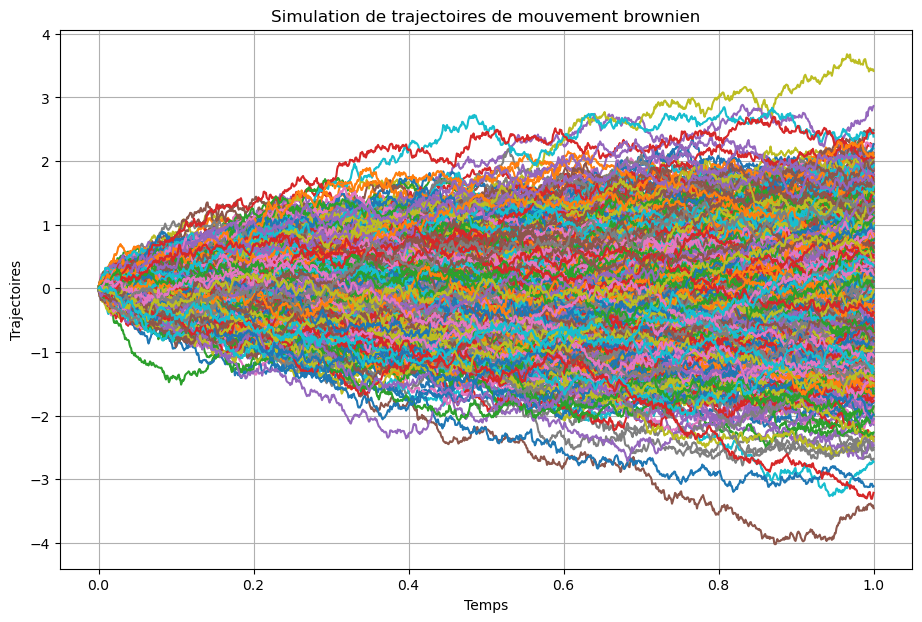

In [68]:
n=10
max=2**n
delta=T/max
nombre_de_simulations=1000
def simulate(T,max,nombre_de_simulations):
    time=np.linspace(0,T,max)
    Z=np.random.normal(0,np.sqrt(delta),(nombre_de_simulations,max))
    W = np.zeros((nombre_de_simulations, max))
    for i in range(1, max):
        W[:, i] = W[:, i-1] + Z[:, i-1]
    
    return time, W
t,W=simulate(T,max,nombre_de_simulations)

plt.figure(figsize=(11, 7))
for i in range(nombre_de_simulations):
    plt.plot(t, W[i, :])

plt.xlabel('Temps')
plt.ylabel('Trajectoires')
plt.title('Simulation de trajectoires de mouvement brownien')
plt.grid(True)
plt.show()



We have normally: 
$$
\begin{aligned}
    \mathbb E[W_T] &= 0, \mathrm{Var}[W_T] = T \\
    \mathrm{Cov}(W_T, W_{T/2}) &= \mathrm{Cov}(W_T-W_{T/2}+W_{T/2}, W_{T/2}) = \mathrm{Cov}(W_{T/2}, W_{T/2}) = \mathrm{Var}[W_{T/2}] = T/2
\end{aligned}
$$

(c): Compute the corresponding sample mean and variance of $W_T$ , and
the sample covariance of $ (W_T , W_{T /2})$. Comment the results by varying the value of n

In [69]:
# Compute samples mean, variance for varying n
## Forward simulation
Nmin = 4
Nmax = 12
moyennes = []
variances = []
cov_vals = []

for n in range(Nmin, Nmax):
    print("Pas de temps: %s" % 2**n)
    t,W = simulate(T,2**n, 1000)

    mu = np.mean(W[-1])
    moyennes.append(mu)
    print("Moyenne: %s" % mu)

    sigma = np.var(W[-1], ddof=1)
    variances.append(sigma)
    print("Variance: %s" % sigma)

    cov_matrix = np.cov(W[:, -1], W[:, 2**(n-1)]) 
    cov = cov_matrix[0][1] 
    cov_vals.append(cov)
    print("Covariance of (WT, WT/2): %s" % cov)
    print()


Pas de temps: 16
Moyenne: 0.036500474959400515
Variance: 0.003149380936000155
Covariance of (WT, WT/2): 0.0080772086313632

Pas de temps: 32
Moyenne: 0.07419407229256075
Variance: 0.010807822868397586
Covariance of (WT, WT/2): 0.015991086773338326

Pas de temps: 64
Moyenne: -0.14032034813655853
Variance: 0.005477917096805429
Covariance of (WT, WT/2): 0.03117652424303472

Pas de temps: 128
Moyenne: 0.069155997662631
Variance: 0.004144916027821189
Covariance of (WT, WT/2): 0.059462821908463304

Pas de temps: 256
Moyenne: 0.34155684716606177
Variance: 0.03329250712595536
Covariance of (WT, WT/2): 0.11986604007441418

Pas de temps: 512
Moyenne: -0.5600153417527737
Variance: 0.08508057038752995
Covariance of (WT, WT/2): 0.23613640696915503

Pas de temps: 1024
Moyenne: 0.8491543445702505
Variance: 0.26349248906040484
Covariance of (WT, WT/2): 0.5396410427748654

Pas de temps: 2048
Moyenne: -0.19070003551744463
Variance: 0.13045430987486809
Covariance of (WT, WT/2): 0.9512784942968315



Comment the results by varying the value of n.

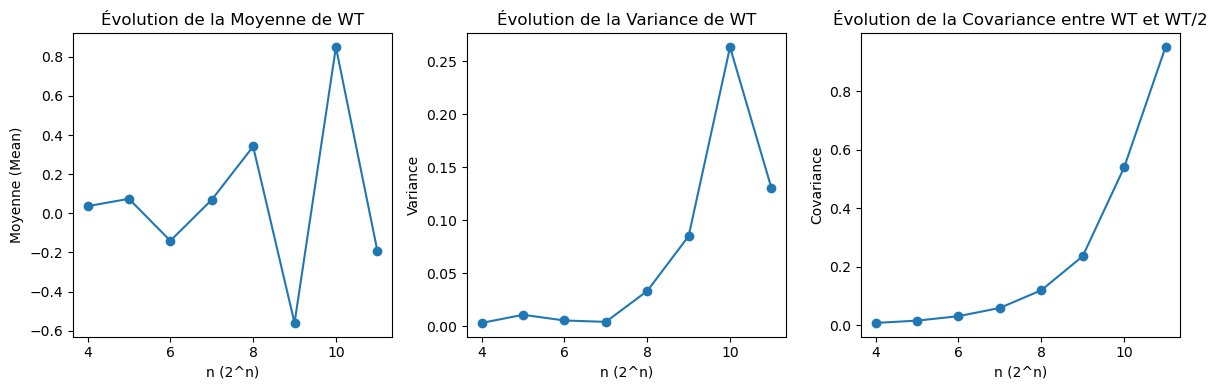

In [70]:
n_values = list(range(Nmin, Nmax))
plt.figure(figsize=(12, 4))

# Tracé de la moyenne
plt.subplot(131)
plt.plot(n_values, moyennes, marker='o')
plt.xlabel('n (2^n)')
plt.ylabel('Moyenne (Mean)')
plt.title('Évolution de la Moyenne de WT')

# Tracé de la variance
plt.subplot(132)
plt.plot(n_values, variances, marker='o')
plt.xlabel('n (2^n)')
plt.ylabel('Variance')
plt.title('Évolution de la Variance de WT')

# Tracé de la covariance
plt.subplot(133)
plt.plot(n_values, cov_vals, marker='o')
plt.xlabel('n (2^n)')
plt.ylabel('Covariance')
plt.title('Évolution de la Covariance entre WT et WT/2')

plt.tight_layout()
plt.show()

Comments: We don't see any convergence by increaing the value of n 

## Backward simulation

(a) We now show that  $W_{\bar s}\,|\, (W_{s_1}=x_1, W_{s_2}=x_2)$ has a $\mathcal N(\bar x, \frac{s_2-s_1}{4})$ distribution.

For that, We will use the characteristic function

In order to compute the characteristic function, we will add and retire $\frac{W_{s_1} + W_{s_2}}{2}$ in the formula near to $e^{iuW_{\bar s}}$



We  have :

\begin{aligned}
    \mathbb E\left[ e^{iuW_{\bar s}} \middle| W_{s_1}=x_1, W_{s_2}=x_2 \right]
   
    &=
    e^{iu\bar x}\mathbb E\left[ \exp\left(iu \left(W_{\bar s}-\frac{W_{s_1} + W_{s_2}}{2}\right)\right) \middle| W_{s_1}=x_1, W_{s_2}=x_2 \right]  \\
    &= e^{iu\bar x}\mathbb E\left[ e^{-iu(W_{\bar s} - W_{s_1})/2} e^{-iu(W_{\bar s}-W_{s_2})/2} \middle| W_{s_1}=x_1, W_{s_2}=x_2 \right] \\
    &= e^{iu\bar x} e^{-\frac 12u^2(\bar s - s_1)/4} e^{-\frac12u^2(s_2 - \bar s)/4} \ \text{(Independance des increments d'un mouvement brownien )} \\
    &= \exp\left(iu\bar x - \frac 12 u^2\frac{s_2 - s_1}4\right) \ \text{(Or on connait la fonction characteristique d'une gaussienne)}\\
\end{aligned}
$$

On en deduit que $W_{\bar s}\,|\, (W_{s_1}=x_1, W_{s_2}=x_2)$ est distribuee suivant la loi normale  $\mathcal N(\bar x, \frac{s_2-s_1}{4})$ 

(b) Justify that conditional distribution of $W_{\bar s}\,|\, (W_{s_1}=x_1, W_{s_2}=x_2, (W_u)_{u\not\in[s_1,s_2]})$ is   $\mathcal N(\bar x, \frac{s_2-s_1}{4})$ 

 The independence of increments outside the interval [s1, s2] doesn't affect the conditional distribution of $W_{\bar s}$ given the specified values.

We can by the same way calculate the characteristic function of $W_{\bar s}\,|\, (W_{s_1}=x_1, W_{s_2}=x_2, (W_u)_{u\not\in[s_1,s_2]})$  and we will find that it is distributed following   $\mathcal N(\bar x, \frac{s_2-s_1}{4})$ 

In [71]:
def backward_simulate_discretized_brownian(T, n):
    max_steps = 2**n
    delta_t = T / max_steps
    
    # Création de la grille de temps
    time = np.linspace(0, T, max_steps + 1)
    
    # Simulation de WT
    W = np.zeros(max_steps + 1)
    
    for i in range(1, max_steps + 1):
        # Utilisation de la moyenne conditionnelle  ̄x := (x1 + x2)/2
        x1 = W[i - 1]
        x2 = W[i]
        mean_conditional = (x1 + x2) / 2
        
        # Utilisation de la variance conditionnelle s2 - s1 / 4
        variance_conditional = (time[i] - time[i - 1]) / 4
        
        # Simulation de W̄s
        W[i - 1] = np.random.normal(mean_conditional, np.sqrt(variance_conditional))
    
    return  W

In [72]:
import numpy as np

def simulate_backward_discretized_brownian(T, n):
    W = np.zeros(2**n + 1)
    dt = T / (2**n)
    t = T
    for i in range(2**n, 0, -1):
        t = t - dt  # Mise à jour de t
        s1 = t - dt
        s2 = t
        x1 = W[i]
        x2 = W[i] + np.sqrt(s2 - s1) * np.random.normal(0, 1)
        W[i-1] = x1 + (x2-x1) * (s2-s1)/(s2- s1)  
    return W


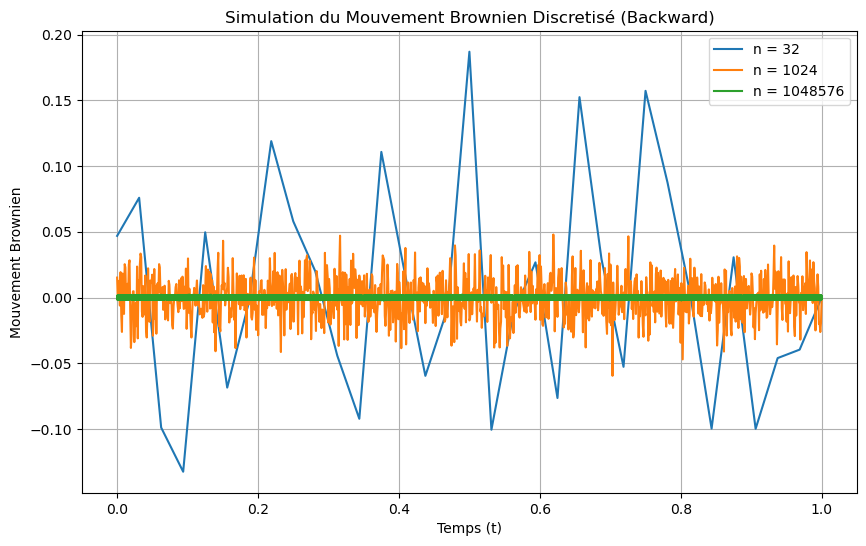

In [73]:
T = 1
n_values = [5, 10, 20]  



plt.figure(figsize=(10, 6))

for n in n_values:
    t = np.linspace(0, T, 2**n+1)
    W = backward_simulate_discretized_brownian(T, n)
    plt.plot(t, W, label=f'n = {2**n}')

plt.xlabel('Temps (t)')
plt.ylabel('Mouvement Brownien')
plt.title('Simulation du Mouvement Brownien Discretisé (Backward)')
plt.legend()
plt.grid(True)

plt.show()



In [74]:
n_values = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
moyennes = []
variances = []
covariances = []

for n in n_values:
    W = backward_simulate_discretized_brownian(T, n)
    moyennes.append(np.mean(W))
    variances.append(np.var(W, ddof=1))
    covariances.append(np.cov(W, W/2, ddof=1)[0, 1])



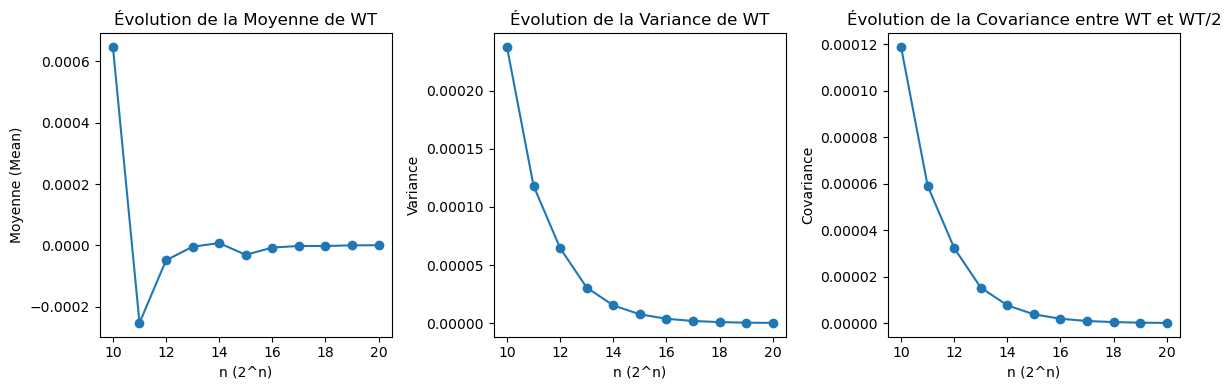

In [75]:
# Tracé de la moyenne
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(n_values, moyennes, marker='o')
plt.xlabel('n (2^n)')
plt.ylabel('Moyenne (Mean)')
plt.title('Évolution de la Moyenne de WT')

# Tracé de la variance
plt.subplot(132)
plt.plot(n_values, variances, marker='o')
plt.xlabel('n (2^n)')
plt.ylabel('Variance')
plt.title('Évolution de la Variance de WT')

# Tracé de la covariance
plt.subplot(133)
plt.plot(n_values, covariances, marker='o')
plt.xlabel('n (2^n)')
plt.ylabel('Covariance')
plt.title('Évolution de la Covariance entre WT et WT/2')

plt.tight_layout()
plt.show()